In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# STATISTICS
# This function plots your sample against a Normal distribution,
# to see whether your sample is normally distributed or not

In [3]:
df = pd.read_csv('/content/drive/My Drive/RR_Dataset/merged_dataset.csv')

In [8]:
review_text_df = df['review_text'][:500]

In [9]:
type(review_text_df)

pandas.core.series.Series

In [10]:
review_text_df.fillna('a', inplace=True)

In [57]:
corpus =[review for review in review_text_df
    if (len(review) > 1) & (len(review) < 2000)
]

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1, 2))

# Fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Get feature names (vocabulary)
# feature_names = vectorizer.get_feature_names_out()
dense_matrix = X.toarray()

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with the dense matrix
df_matrix = pd.DataFrame(dense_matrix, columns=feature_names)


In [58]:
df_matrix

00  00 afternoon  00 come  000  000 wine  000 yen  01  01 14  01 2024  \
0     0             0        0    0         0        0   0      0        0   
1     0             0        0    0         0        0   0      0        0   
2     0             0        0    0         0        0   0      0        0   
3     0             0        0    0         0        0   0      0        0   
4     0             0        0    0         0        0   0      0        0   
..   ..           ...      ...  ...       ...      ...  ..    ...      ...   
494   0             0        0    0         0        0   0      0        0   
495   0             0        0    0         0        0   0      0        0   
496   0             0        0    0         0        0   0      0        0   
497   0             0        0    0         0        0   0      0        0   
498   0             0        0    0         0        0   0      0        0   

     039802  10  10 10  10 30pm  10 attentive  10 come  10 discount  \
0         0   0      0        0             0        0            0   
1         0   0      0        0             0        0            0   
2         0   0      0        0             0        0            0   
3         0   0      0        0             0        0            0   
4         0   0      0        0             0        0            0   
..      ...  ..    ...      ...           ...      ...          ...   
494       0   0      0        0             0        0            0   
495       0   0      0        0             0        0            0   
496       0   0      0        0             0        0            0   
497       0   0      0        0             0        0            0   
498       0   0      0        0             0        0            0   

     10 experience  10 ll  10 manager  10 minus  10 minutes  10 ordered  \
0                0      0           0         0           0           0   
1                0      0           0         0           0           0   
2                0      0           0         0           0           0   
3                0      0           0         0           0           0   
4                0      0           0         0           0           0   
..             ...    ...         ...       ...         ...         ...   
494              0      0           0         0           0           0   
495              0      0           0         0           0           0   
496              0      0           0         0           0           0   
497              0      0           0         0           0           0   
498              0      0           0         0           0           0   

     10 people  10 persons  10 pig  10 pm  10 recommend  10 service  \
0            0           0       0      0             0           0   
1            0           0       0      0             0           0   
2            0           0       0      0             0           0   
3            0           0       0      0             0           0   
4            0           0       0      0             0           0   
..         ...         ...     ...    ...           ...         ...   
494          0           0       0      0             0           0   
495          0           0       0      0             0           0   
496          0           0       0      0             0           0   
497          0           0       0      0             0           0   
498          0           0       0      0             0           0   

     10 singgang  10 table  10 tried  10 years  100  100 10  100 dollars  \
0              0         0         0         0    0       0            0   
1              0         0         0         0    0       0            0   
2              0         0         0         0    0       0            0   
3              0         0         0         0    0       0            0   
4              0         0         0         0    0       0            0   
..   

In [61]:
word_frequencies = df_matrix.sum(axis=0)
word_frequencies = word_frequencies.sort_values(ascending=False)
word_frequencies.head(50)

food           290
service        235
good           230
crab           217
restaurant     111
great           97
dishes          95
delicious       91
staff           81
chili           76
nice            74
fried           71
seafood         67
chili crab      63
chilli          60
experience      57
place           56
best            54
rice            53
time            52
taste           50
chilli crab     49
singapore       47
really          47
sauce           47
price           43
attentive       43
ordered         42
dish            41
friendly        41
like            41
meal            41
excellent       41
house           39
red             39
try             39
come            38
fish            37
red house       37
lunch           36
definitely      36
dining          36
menu            35
kueh            34
served          34
overall         34
eat             34
set             33
dinner          33
fresh           33
dtype: int64

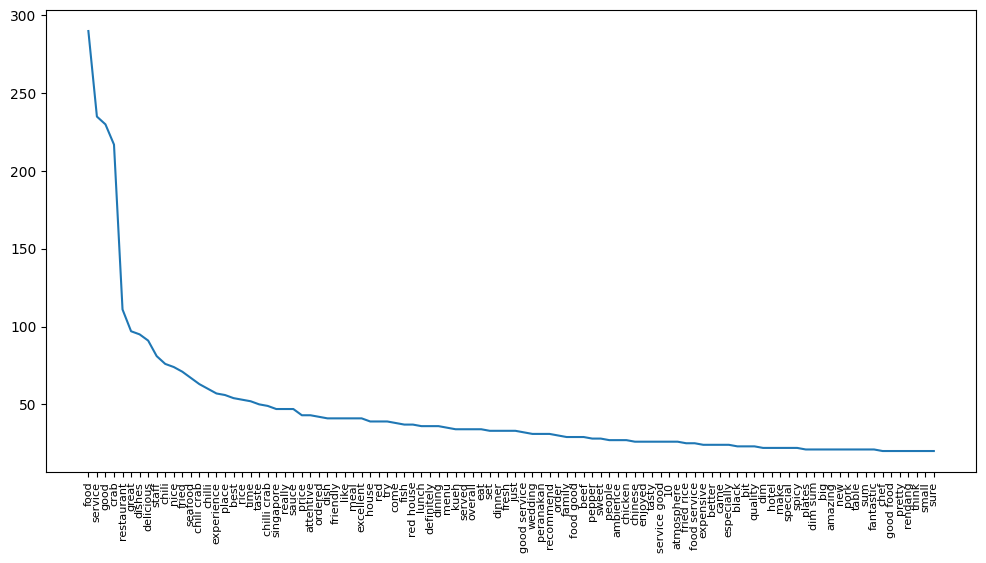

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(word_frequencies[0:100])
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [77]:
vectorizer_2 = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

# Fit and transform the text data
X_2 = vectorizer_2.fit_transform(review_text_df)

# Convert to dense matrix
dense_matrix_2 = X_2.toarray()

# Get feature names (terms)
feature_names_2 = vectorizer_2.get_feature_names_out()

# Create a DataFrame with the dense matrix and feature names
df_tfidf = pd.DataFrame(dense_matrix_2, columns=feature_names_2)





In [78]:
word_frequencies_2 = df_tfidf.sum(axis=0)
word_frequencies_2 = word_frequencies_2.sort_values(ascending=False)
word_frequencies_2.head(50)

food             22.292998
good             21.256967
service          18.067080
crab             14.715386
great            11.339778
nice             10.301929
delicious         9.346511
restaurant        8.071882
chili             7.537098
good service      7.182937
chili crab        6.878559
food good         6.673535
staff             6.494556
excellent         6.416559
food service      6.184236
place             6.028150
dishes            6.000847
good food         5.746709
chilli            5.693402
service good      5.642054
seafood           5.579646
best              5.488694
experience        5.387766
friendly          5.272944
chilli crab       5.151483
attentive         4.931456
time              4.787152
fried             4.755292
really            4.714033
singapore         4.704692
price             4.690402
taste             4.643370
come              4.617337
ambience          4.077475
fresh             4.032915
sauce             3.961974
fantastic         3.902914
tasty             3.837107
expensive         3.763798
recommend         3.727558
nice food         3.717500
atmosphere        3.690577
food great        3.643882
great food        3.598641
rice              3.559330
definitely        3.552626
try               3.541038
meal              3.454361
great service     3.397878
dinner            3.386942
dtype: float64

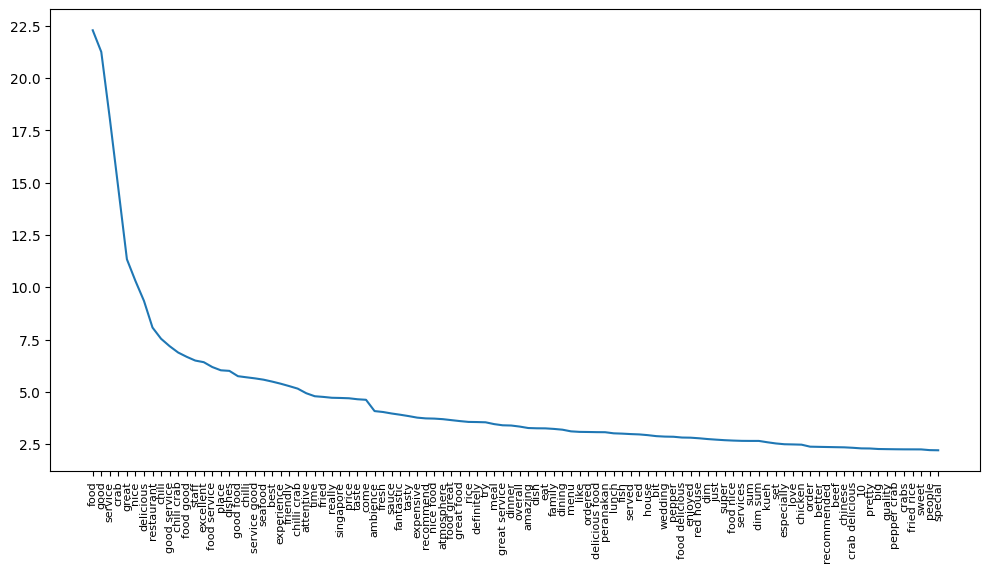

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(word_frequencies_2[0:100])
plt.xticks(rotation=90, fontsize=8)
plt.show()